# 1차 Autoregressive (AR) 모형

In [6]:
## 예시: 사람이 만들어 내는 소리 기계소리는 stationary(정상: 지속적으로 비슷한 값을 가짐)이다. 
## 이들의 물리적 소리등은 자기상관게수가 비교적 오랫동안 크게 남아있어 정상적으로 보인다 
## 자연현상에서 나오는 소리 등등 (에너지의 분산또는 움직임이 거의 같다.)
## 이러한 자연현상이나 stationary 이면 AR을 많이 쓴다( 차수가 많이 올라가도 자기상관계수가 높아서 예측이 많이 가능하다)

## 경제현상( 사람이 개입하거나 사건이 개입하여 나타나는 데이터 현상은 거의 non-stationary: 비슷한 현상을 지속적으로 유지하지 않음)
## 주가의 경우 사건이 많고 사람이 개입을 하는 데이터이므로 비정상이다
## 이러한 경제현상이나 주변의 영향을 많이 받는경우 MA 모형을 많이 쓴다 
## (차수가 1차수에서만 거의 영향을 미치지만 차수가 올라가면 자기상관계수는 거의 0에 가깝다. 2015년의 주가는 2017년의 주가에 거의 영향을 미치지 않는다)

시계열 자료 중에는 시차가 증가해도 자기 상관계수가 비교적 오랫동안 0이 아닌 값으로 남아 있는 것을이 많다. 이러한 시계열에 MA 모형을 사용하면 차수가 너무 커진다. 이를 극복하기 위한 모형 중의 하나가 Autoregressive (AR) 모형이다.

**AR 모형은 백색 잡음의 현재값과 자기 자신의 과거값의 선형 가중합으로 이루어진 정상 확률 모형**이다.

$$ Y_t = \phi_1 Y_{t-1} + \phi_2 Y_{t-2} + \cdots + \phi_p Y_{t-p} + e_t $$

자기 자신의 과거 값을 사용하기 때문에 Autoregressive 라는 이름이 붙여졌다.

AR 모형은 임의의 계수 값을 가질 수 있는 MA 모형과 달리 정상 과정이 되기 위해서는 **계수의 값에 제한 조건**이 붙는다. 구체적인 제한 조건은 차수에 따라 달라진다.

AR 모형은 얼핏 보기에 일반 선형 확률 과정(general linear process)의 수식을 따르지 않는 것처럼 보이지만 일반 선형 확률 과정의 현태로 변환이 가능하다.


## AR(1) 모형

1차 AR 모형 즉, AR(1) 모형은 백색 잡음의 현재값과 1스텝 과거의 자기 자신의 값만의 가중합으로 이루어진 모형이다. 수식은 다음과 같다.

$$ Y_t = \phi Y_{t-1} + e_t $$

이 수식에서 계수 $\phi$는 다음 조건을 만족해야 한다.

$$ -1 < \phi < 1 $$

AR(1) 모형은 다음과 같이 일반 선형 확률 과정의 형태로 바꿀 수 있다.

$$
\begin{eqnarray}
Y_t 
&=& \phi Y_{t-1} + e_t \\
&=& \phi \left( \phi Y_{t-2} + e_{t-1} \right) + e_t \\
&=& \phi^2 Y_{t-2} + \phi e_{t-1} + e_t \\
&=& \phi^2  \left( \phi Y_{t-3} + e_{t-2} \right)  + \phi e_{t-1} + e_t \\
&=& \phi^3 Y_{t-3} + \phi^2 e_{t-2}  + \phi e_{t-1} + e_t \\
&\vdots& \\
&=& e_t + \phi e_{t-1} + \phi^2 e_{t-2} + \phi^3 e_{t-3} + \cdots  \\
\end{eqnarray}
$$

AR(1) 모형의 기대값은 MA모형과 마찬가지로 0이다.

$$ \text{E}[Y_t] = 0 $$

이는 다음과 같이 증명할 수 있다.

$$
\begin{eqnarray}
\text{E}[Y_t] = \mu 
&=& \text{E} \left[ \phi  Y_{t-1} - e_{t-1} \right] \\
&=& \phi\text{E} [ Y_{t-1} ] -\text{E} [ e_{t-1} ] \\
&=& \phi \mu -   0 \\ 
(1-\phi)\mu &=& 0 \\
\mu &=& 0 \; \text{ if } \phi \neq 1 \\
\end{eqnarray}
$$

AR(1) 모형의 분산은 다음과 같다.

$$ \gamma_0 = \dfrac{\sigma_e^2}{1-\phi^2} $$

이는 다음과 같이 증명할 수 있다.

우선 $e_t$는 과거의 값 $Y_{t-k}$ (for $k>1$)에 영향을 주지 않기 때문에 독립이다.  따라서

$$ \text{E}[e_tY_{t-k}] = \text{E}[e_t]\text{E}[Y_{t-k}] = 0 $$ 이다.

$$
\begin{eqnarray}
\text{Var}[Y_t] = \gamma_0 = \text{E}[Y_t^2] 
&=& \text{E} \left[ (\phi  Y_{t-1} - e_{t})^2 \right] \\
&=& \text{E} \left[ \phi^2  Y_{t-1}^2 - 2\phi Y_{t-1} e_{t-1} + e_{t}^2 \right] \\
&=& \phi^2\text{E} [ Y_{t-1}^2 ] - 2 \phi \text{E} [ Y_{t-1} e_{t} ] + \text{E} [ e_{t}^2 ] \\
&=& \phi^2 \gamma_0 - 0 + \sigma_e^2 \\
(1-\phi^2)\gamma_0 &=& \sigma_e^2 \\
\gamma_0 &=&  \dfrac{\sigma_e^2}{1-\phi^2} \; \text{ if } \phi^2 \neq 1 \\
\end{eqnarray}
$$


AR(1) 모형의 자기공분산은 다음과 같다.

$$ \gamma_k = \phi^k \dfrac{\sigma_e^2}{1-\phi^2} $$

이는 다음과 같이 증명한다.

$$
\begin{eqnarray}
\gamma_k &=& \text{E}[Y_{t-k} Y_t] \\
&=& \text{E} \left[ \phi  Y_{t-k} Y_{t-1} - Y_{t-k} e_{t} \right] \\
&=& \phi \text{E} \left[ Y_{t-k} Y_{t-1} \right] - \text{E} \left[ Y_{t-k} e_{t} \right] \\
&=& \phi \gamma_{k-1} \\
\end{eqnarray}
$$

$\gamma_0 =  \dfrac{\sigma_e^2}{1-\phi^2} $과 위 성질에 의해 귀납적으로 증명된다.


자기공분산으로부터 자기상관계수는 다음과 같다

$$ \rho_k = \dfrac{\gamma_k}{\gamma_0} = \phi^k $$

1과 -1사이의 여러가지 $\phi$에 대해 AR(1) 모형의 자기상관계수 함수 즉, ACF를 그리면 다음과 같다. 

* $\phi > 0$ 이면 ACF는 지수함수적으로 감소한다.
* $\phi < 0$ 이면 ACF는 부호를 바꿔가면서 (진동하면서) 지수함수적으로 감소한다.

In [1]:
##스타트업 파일

from scipy.stats import norm
import numpy as np
import scipy as sp
from pandas.core import datetools 
import pandas as pd
import statsmodels.api as sm ## R 패키지에서 불러온것, 샘플데이터 옮겨쓸수 있는 프로젝트 있음. 회귀분석에 유용 
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk 
## 전처리 

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pylab 
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

## Anaconda: localhost:8890
## python3: localhost:8888


C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  


(-1.1, 1.1)

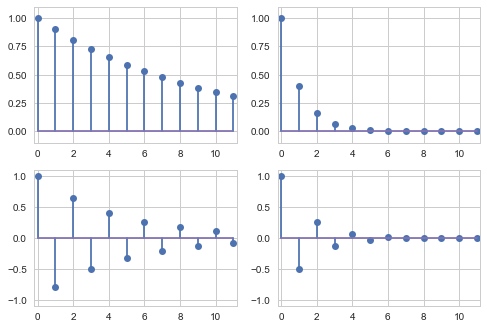

In [2]:
lag = np.arange(12)

plt.subplot(221)
acf = 0.9 **lag
plt.stem(acf); plt.xlim(-0.2, 11.2); plt.ylim(-0.1, 1.1)

plt.subplot(222)
acf = 0.4 **lag
plt.stem(acf); plt.xlim(-0.2, 11.2); plt.ylim(-0.1, 1.1)

plt.subplot(223)
acf = (-0.8) **lag
plt.stem(acf); plt.xlim(-0.2, 11.2); plt.ylim(-1.1, 1.1)

plt.subplot(224)
acf = (-0.5) **lag
plt.stem(acf); plt.xlim(-0.2, 11.2); plt.ylim(-1.1, 1.1)

## 차수가 많아져도 자기상관계수가 높아서 계속 비슷한 데이터값을 갖는다 
## MA 모형과는 많이다름 

앞의 그림에서 볼 수 잇듯이 $\phi$의 절대값이 1에 가까울 수록 자기상관계수의 감소 속도가 작아진다. 즉, 시차가 증가해도 상관계수가 크게 작아지지 않는다. 그럼 만약 $\phi$의 절대값이 1이거나 1보다 크다면 어떻게 될까?

$\phi$값의 크기가 1 이상이 되면 분산이 계속 증가하는 비정상 과정이 된다. $\phi=1$인 경우를 보자.


$$
\begin{eqnarray}
Y_t &=& Y_{t-1} + e_t \\
\text{Var}[Y_t] &=& \text{Var}[Y_{t-1} + e_t] \\
 &=& \text{Var}[Y_{t-1}] + \text{Var}[e_t]  \;\; (\text{independence})\\
\end{eqnarray}
$$

$$ \text{Var}[Y_t] > \text{Var}[Y_{t-1}] $$

AR(1) 모형의 경우 $\left| \phi \right| < 1$ 조건은 **정상상태 조건(stationarity condition)**이 된다.

## AR(1차) 모형의 시뮬레이션

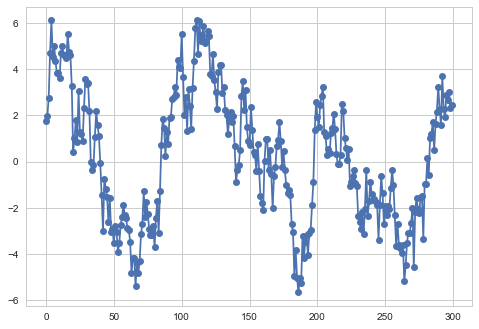

In [3]:
import statsmodels.api as sm
np.random.seed(0)
phi1 = 0.9
p1 = sm.tsa.ArmaProcess([1, -phi1],[1])
y1 = p1.generate_sample(300)
plt.plot(y1, 'o-')
##차수가 1인경우 (시점과 lag(시차) 1차이가 나는 모형)

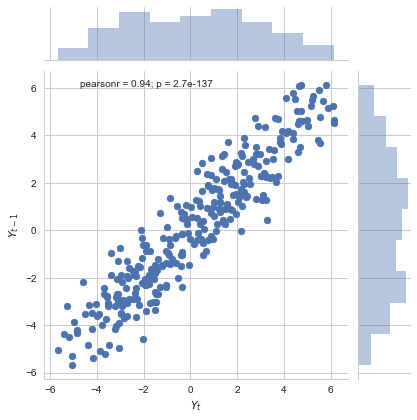

In [4]:
df = pd.DataFrame(np.c_[y1[:-1], y1[1:]])
df.columns = ["$Y_t$", "$Y_{t-1}$"]
sns.jointplot("$Y_t$", "$Y_{t-1}$", df)
## 높은 상관계수를 가진다 

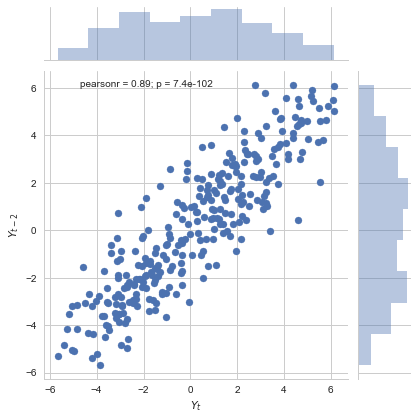

In [5]:
df = pd.DataFrame(np.c_[y1[:-2], y1[2:]])
df.columns = ["$Y_t$", "$Y_{t-2}$"]
sns.jointplot("$Y_t$", "$Y_{t-2}$", df)
## AR lag = 2차 데이터 

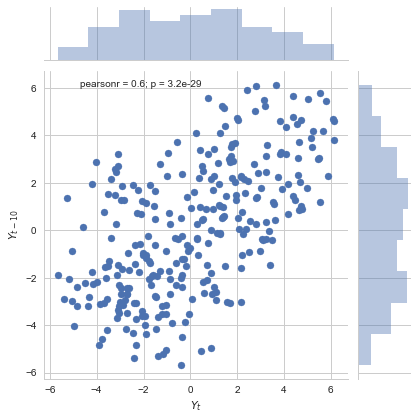

In [7]:
df = pd.DataFrame(np.c_[y1[:-10], y1[10:]])
df.columns = ["$Y_t$", "$Y_{t-10}$"]
sns.jointplot("$Y_t$", "$Y_{t-10}$", df)
## 차수가 10인경우에도 많은 영향을 미친다 
## 즉 자기상관계수가 높고 p-value는 낮다

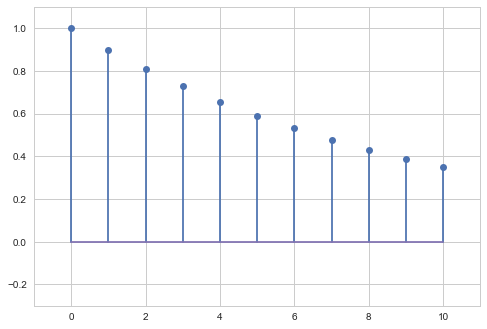

In [8]:
plt.stem(p1.acf(11))
plt.xlim(-1, 11)
plt.ylim(-0.3, 1.1);
## 차수에 따른 auto correlation 

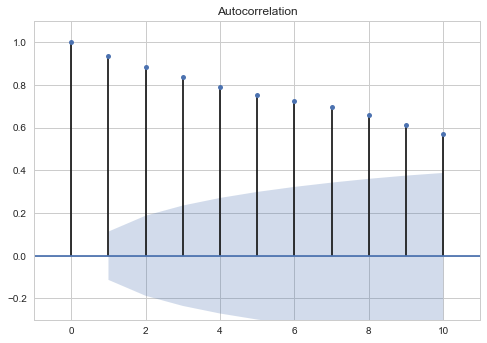

In [9]:
sm.graphics.tsa.plot_acf(y1, lags=10);
plt.xlim(-1, 11)
plt.ylim(-0.3, 1.1);
## 하늘색영역은 p-value의 기각역( 차수 1부터 10까지 )
## auto correlation이 p-value의 기각역 보다 높으므로 믿을만한 자기 상관계수를 가진다 